# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

# Importing and cleaning the Data

In [2]:
df = pd.read_csv("appdata10.csv")

In [3]:
df.head()

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

In [4]:
df.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
# Converting the 'hour' column from string datatype to int.
df["hour"] = df.hour.str.slice(1, 3).astype(int)

In [7]:
df["hour"]

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

# EDA and Visualisations

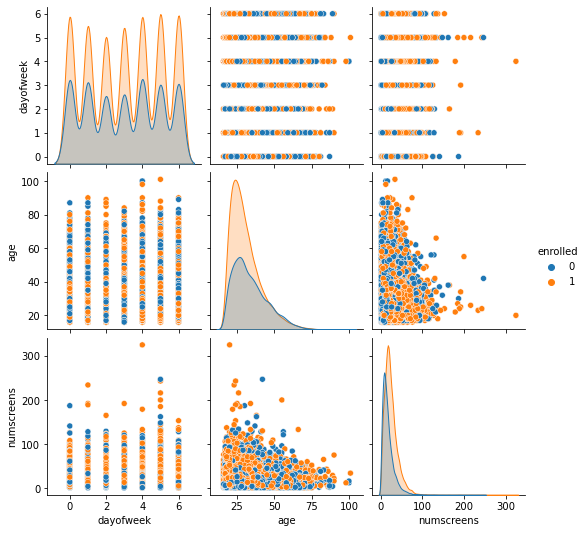

In [8]:
df2 = df[["dayofweek", "age", "numscreens", "enrolled"]]
sns.pairplot(data=df2, hue="enrolled")

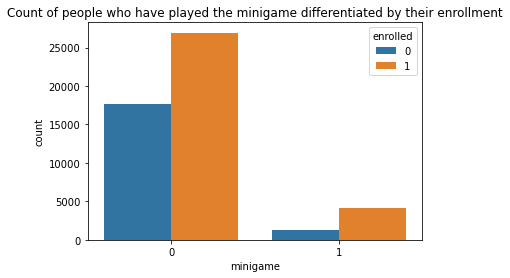

In [9]:
sns.countplot(data=df, x="minigame", hue="enrolled")
plt.title("Count of people who have played the minigame differentiated by their enrollment");

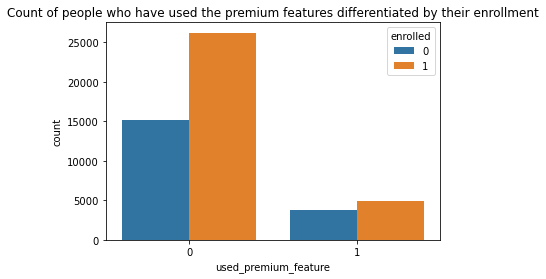

In [10]:
sns.countplot(data=df, x="used_premium_feature", hue="enrolled")
plt.title("Count of people who have used the premium features differentiated by their enrollment");

<AxesSubplot:xlabel='hour', ylabel='Count'>

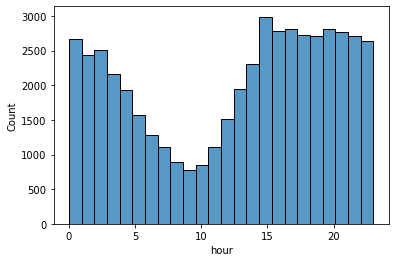

In [11]:
sns.histplot(data=df, x="hour", bins=24)

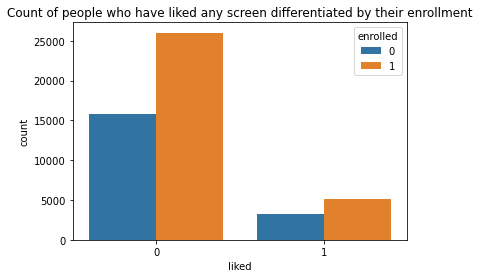

In [12]:
sns.countplot(data=df, x="liked", hue="enrolled")
plt.title("Count of people who have liked any screen differentiated by their enrollment");

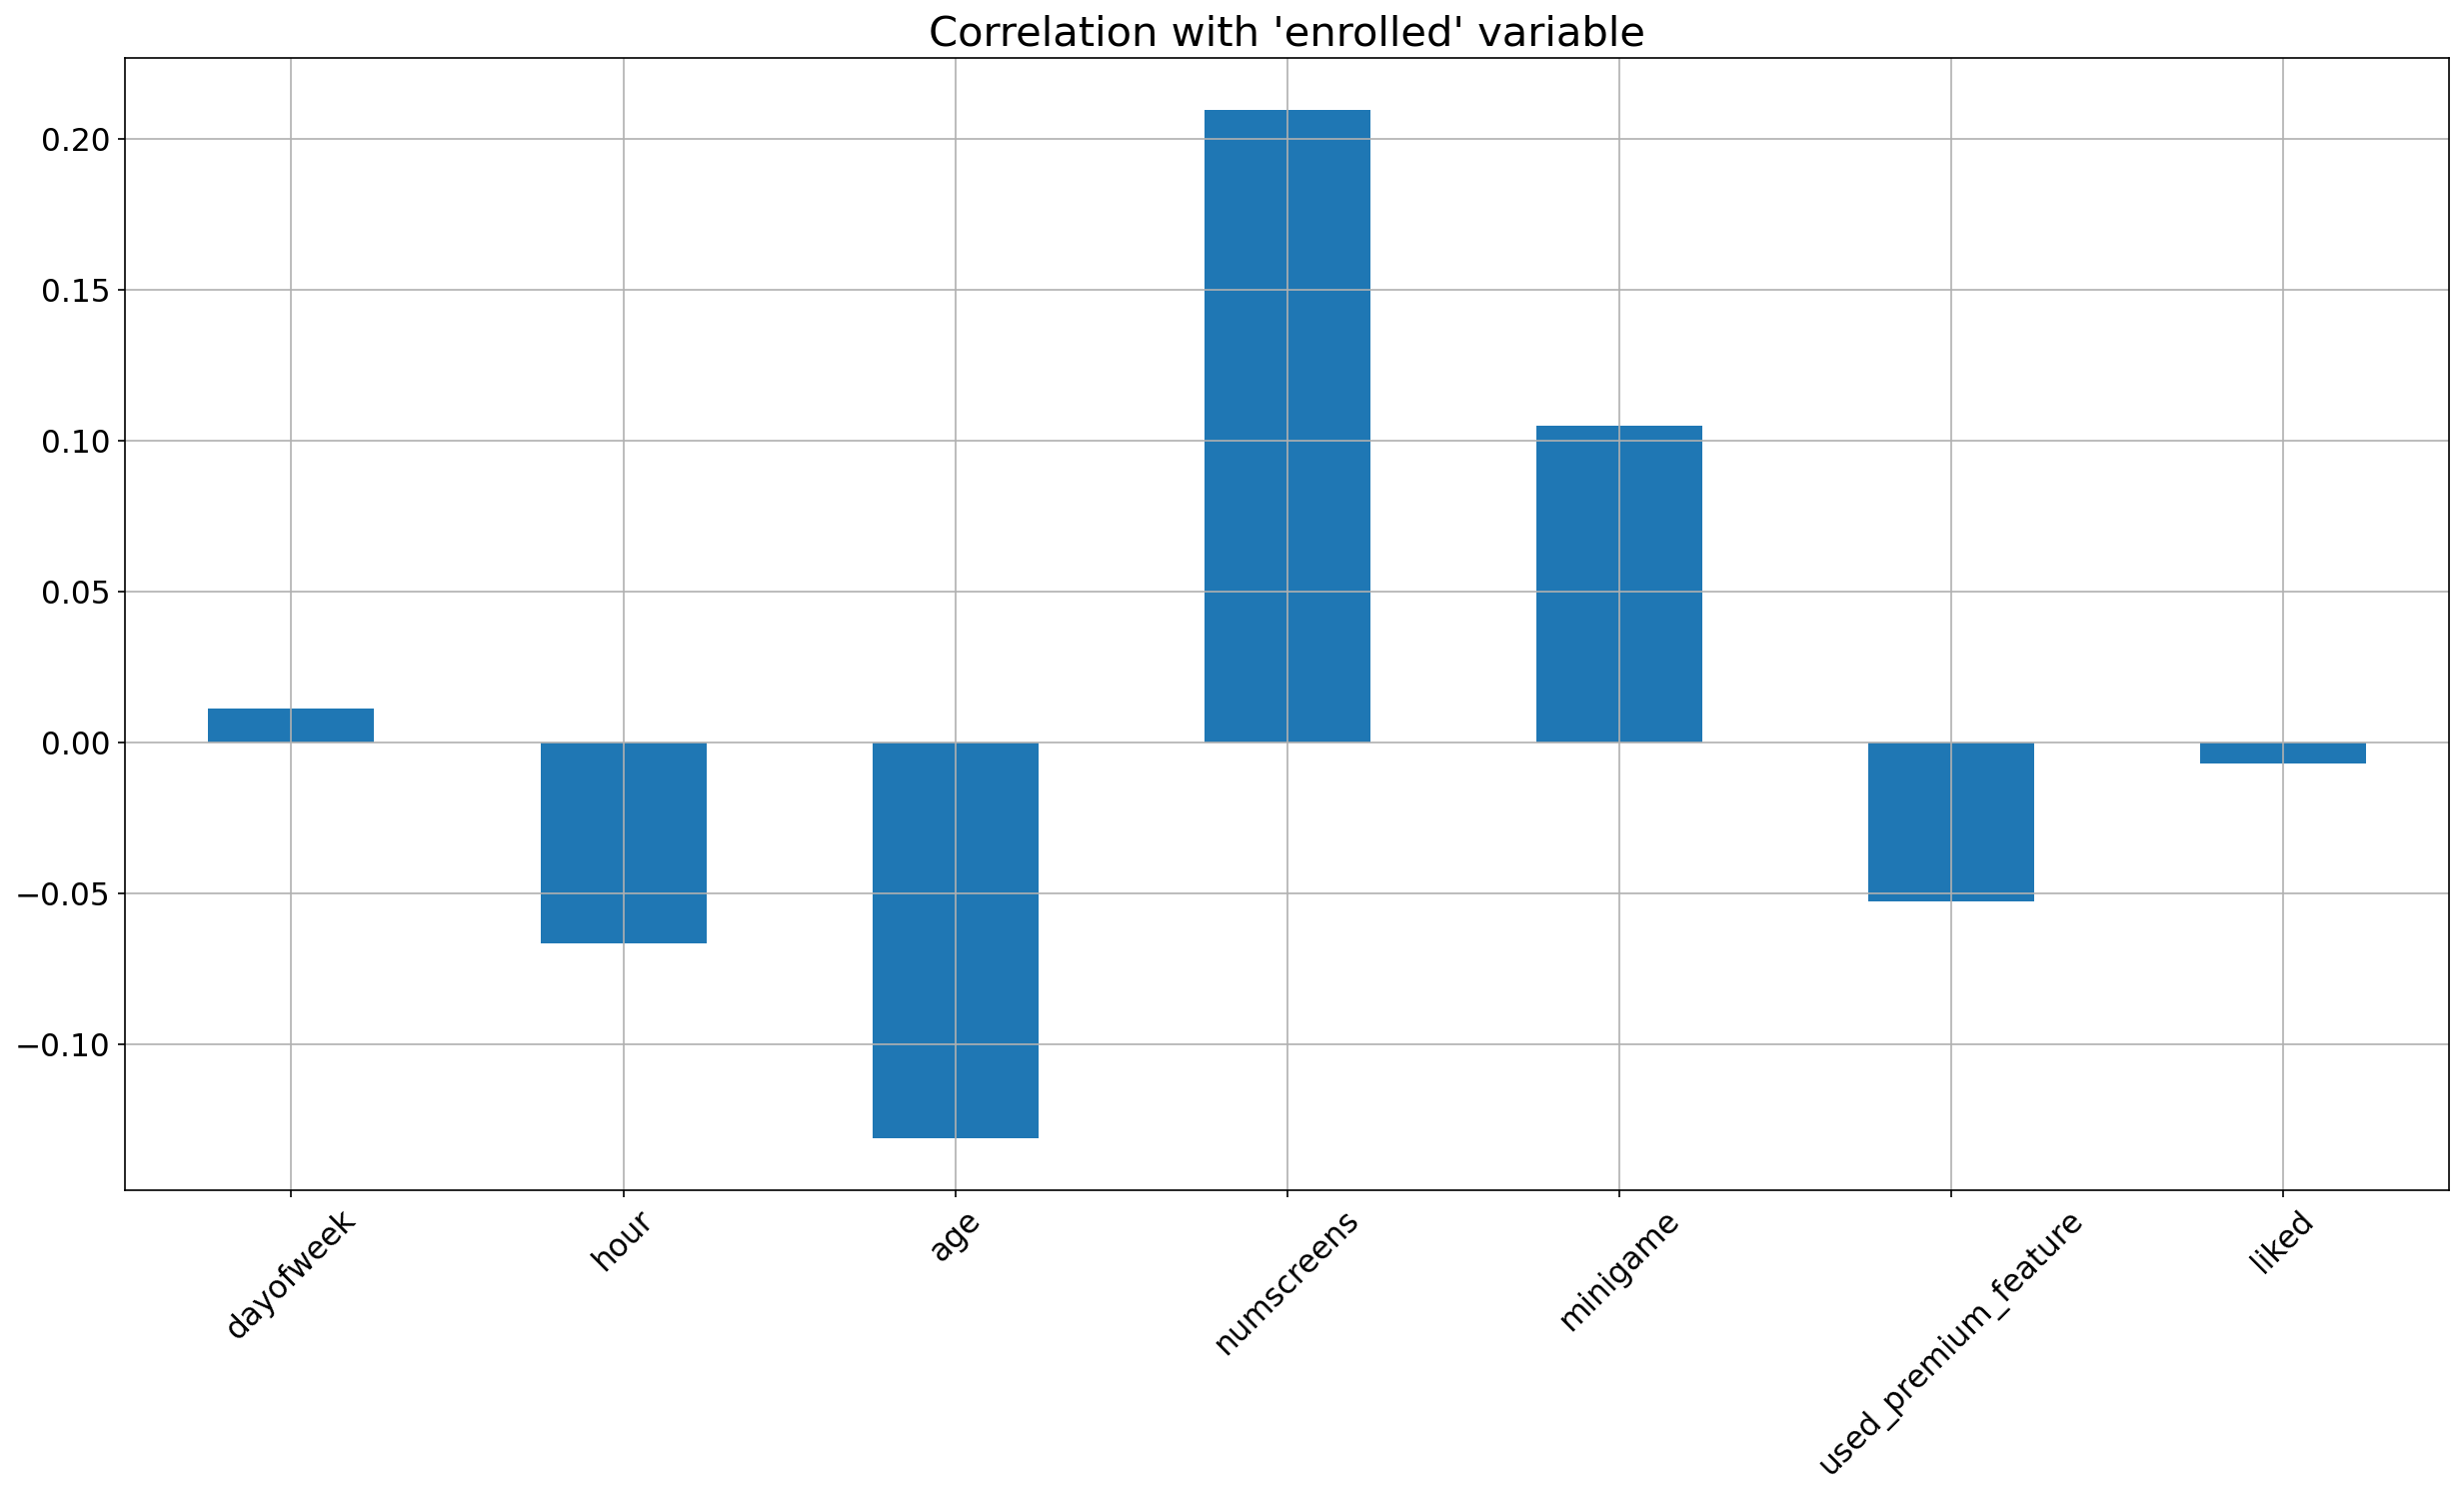

In [13]:
df3 = df[["dayofweek", "hour", "age", "numscreens", "minigame", "used_premium_feature", "liked", "enrolled"]]
plt.figure(dpi=150)
df3.corrwith(df3.enrolled).drop("enrolled").plot.bar(grid=True, figsize=(20, 10),
                                   fontsize=15, rot=45)
plt.title("Correlation with 'enrolled' variable", fontsize=20);

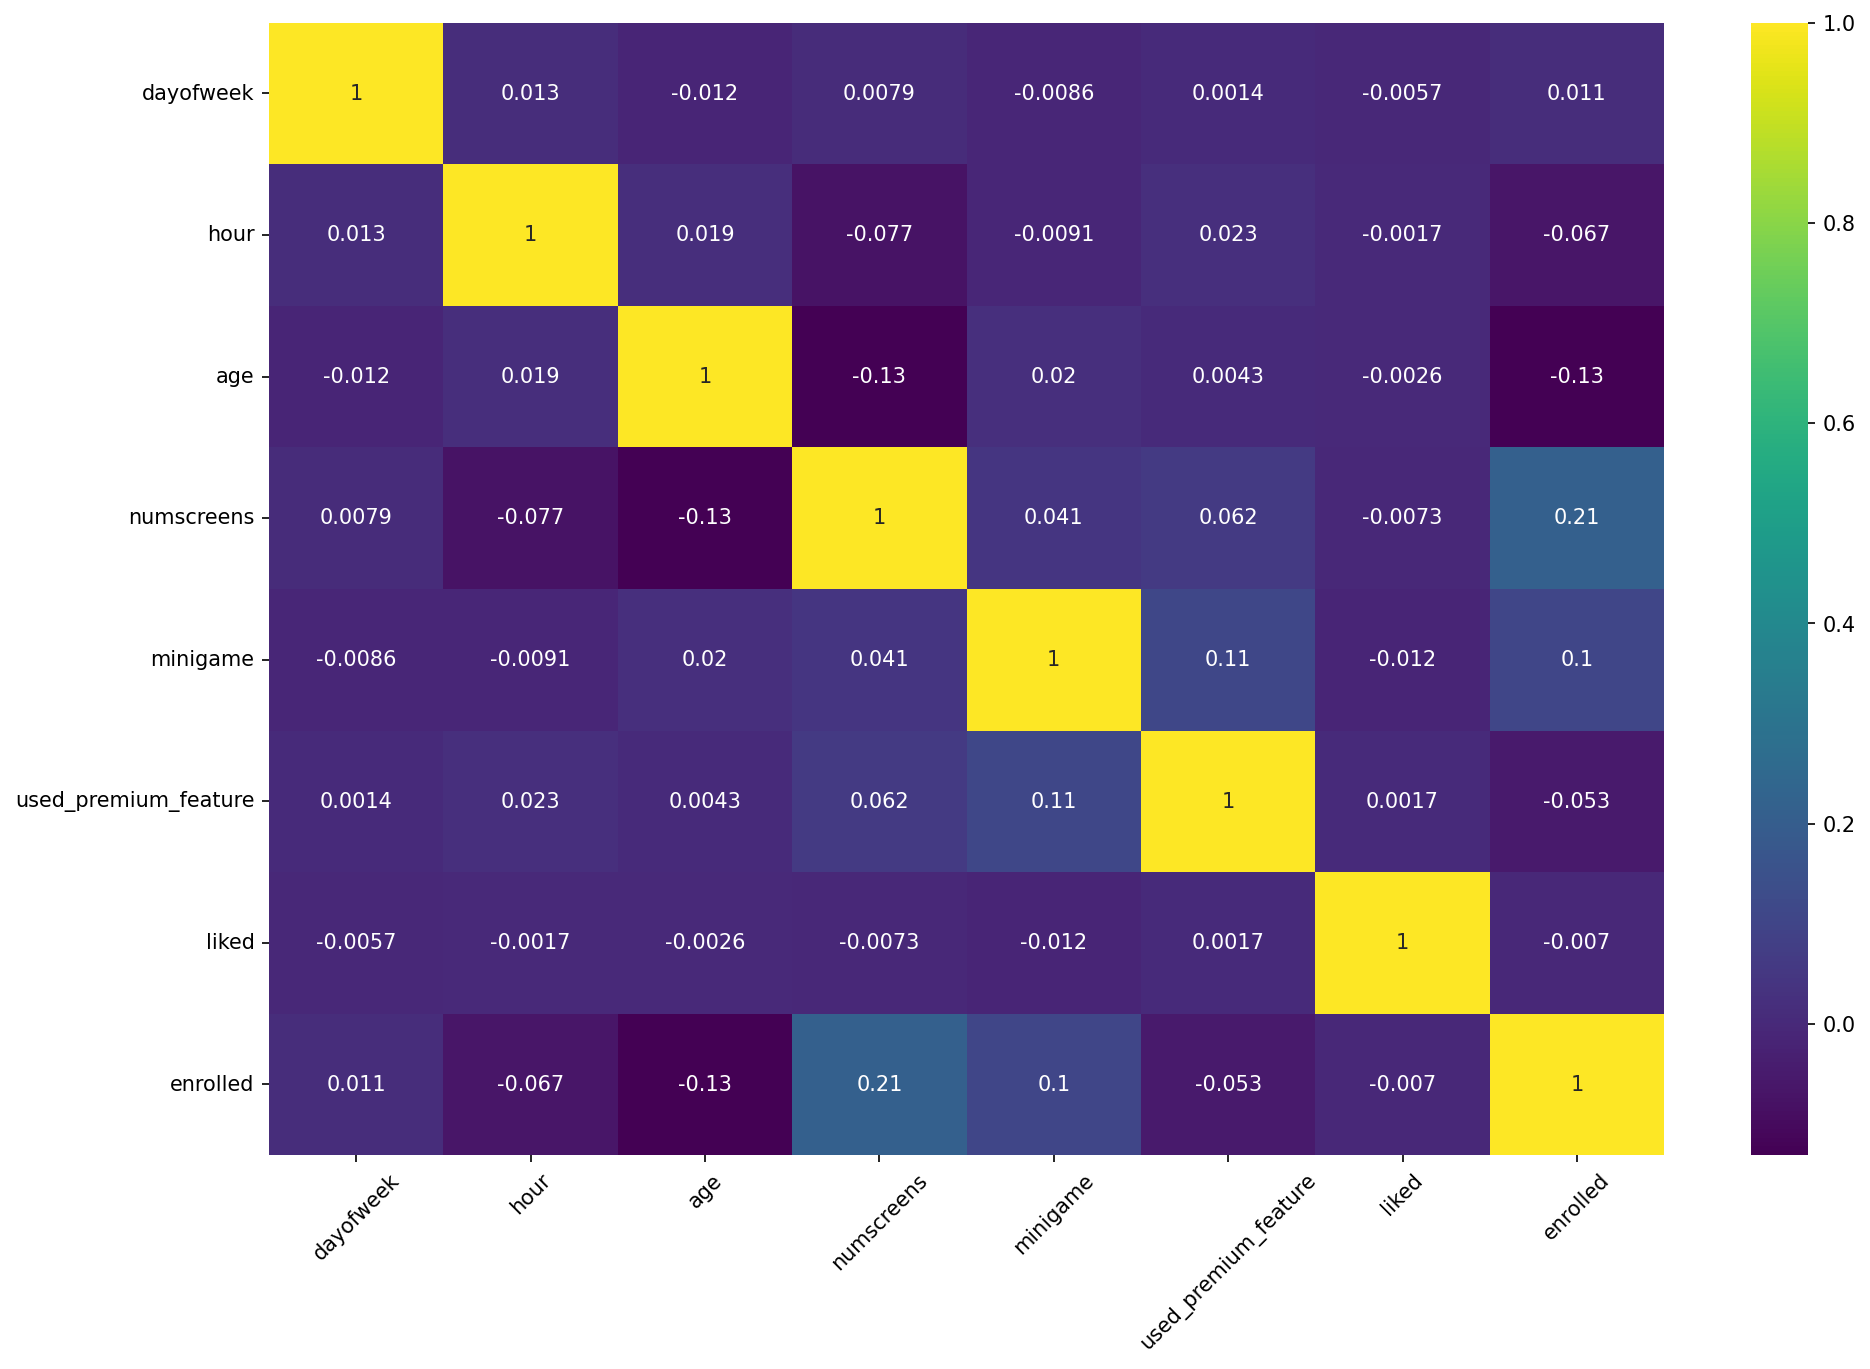

In [14]:
plt.figure(figsize=(15, 10), dpi=150)
sns.heatmap(data=df3.corr(), annot=True, cmap="viridis")
plt.xticks(rotation=45);

# Feature Engineering

In [15]:
# Converting the datatype of 'first_open' and 'enrolled_date' and from string to date-time
df.dtypes
df["first_open"] = [parser.parse(row_data) for row_data in df["first_open"]]
df["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in df["enrolled_date"]]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int32         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   used_premium_feature  50000 non-null  int64         
 9   enrolled              50000 non-null  int64         
 10  enrolled_date         31074 non-null  datetime64[ns]
 11  liked                 50000 non-null  int64         
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [17]:
# Creating a new column to show the difference time the user first opened the app and the time when that user enrolled.
df["difference"] = (df["enrolled_date"] - df["first_open"]).astype("timedelta64[h]")  # this converts into no. of hours

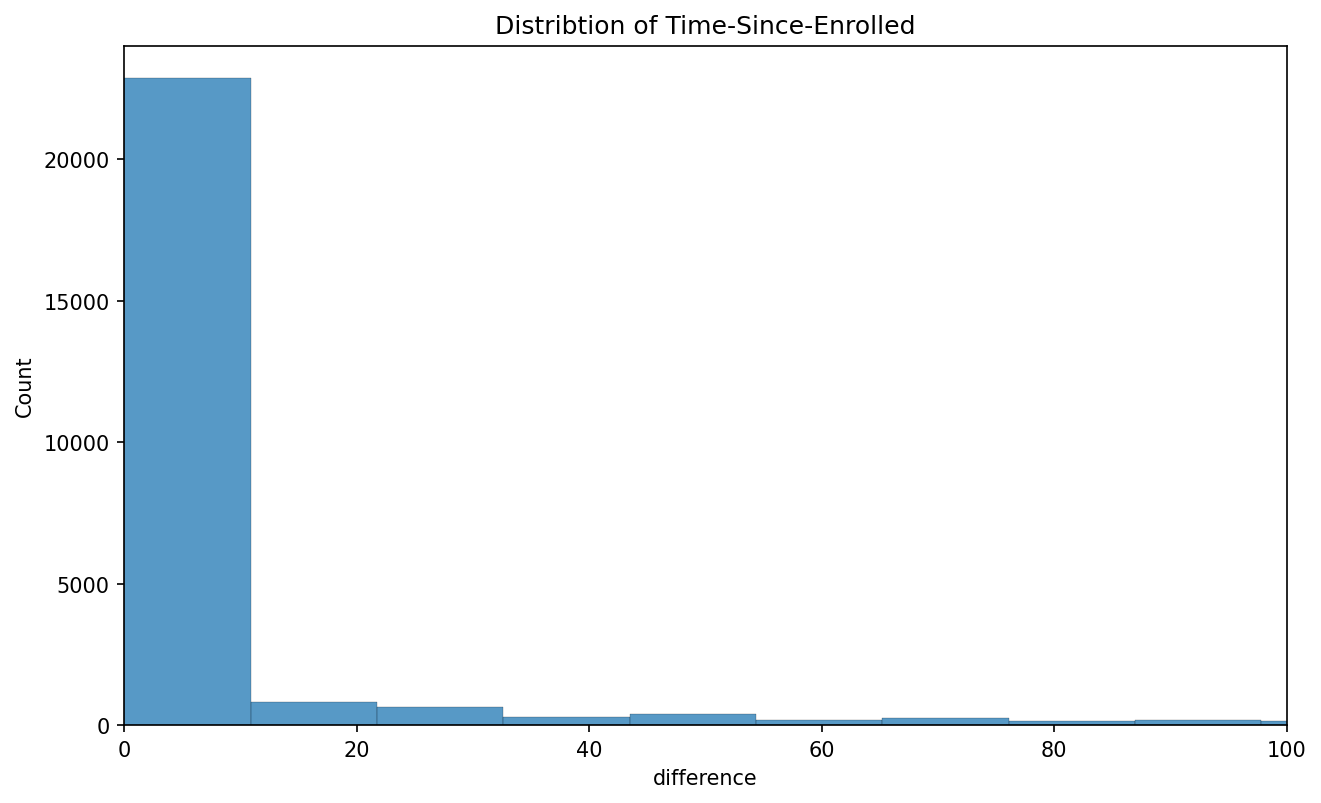

In [18]:
plt.figure(figsize=(10, 6), dpi=150)
sns.histplot(data=df[df["difference"] >= 0], x="difference", bins=500)
plt.xlim(0, 100)
plt.title("Distribtion of Time-Since-Enrolled");

A lot of people tend to enroll within 0 to 48 hours. Hence we put a cut-off time to our response variable which is as follows:
We are going to change every single response variable to zero. This means, every person who never enrolled is zero as it is already, so for those people who actually did enroll will be put to 0 if they're above the 48-hour mark. If they are 48 hours or less, we're still going to leave them as enrolled, but when they're higher than that, then they will be removed. This is done so that we don't need to wait until the end of time to check the model's accuracy (i.e., we don't want to wait forever for a new user to enroll (if they decide to enroll after, say, 10 days etc.) and would want to predict within the 2-day mark whether the person will enroll or not).

In [19]:
df.loc[df["difference"] > 48, "enrolled"] = 0

In [20]:
# Getting rid of 'difference', 'enrolled_date' columns as they are no longer required.
df = df.drop(["difference", "enrolled_date"], axis=1)

In [21]:
df.head()

user              first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:51.273          3     2   23   
1  333588 2012-12-02 01:16:00.905          6     1   24   
2  254414 2013-03-19 19:19:09.157          1    19   23   
3  234192 2013-07-05 16:08:46.354          4    16   28   
4   51549 2013-02-26 18:50:48.661          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled  liked  
0                     0         0      0  
1                     0         0      0  
2                     1         0      1  
3                     0         1      0  
4                     0         1      1

We are now given a list of top-most relevant screens and based on that, we need to determine that whether a particular user viewed one of the top screens. Furthermore, We will also create another column 'Other' if the user also browsed through the screen not listed in the top-most relevant screens.

In [22]:
top_screens = pd.read_csv("top_screens.csv").top_screens.values

In [23]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [24]:
df["screen_list"] = df.screen_list.astype(str) + ","

for screen in top_screens:
    df[screen] = df.screen_list.str.contains(screen).astype(int)
    df["screen_list"] = df.screen_list.str.replace(screen + ",", "")

df["Other"] = df.screen_list.str.count(",")
df = df.drop("screen_list", axis=1)

In [25]:
df.head()

user              first_open  dayofweek  hour  age  numscreens  minigame  \
0  235136 2012-12-27 02:14:51.273          3     2   23          15         0   
1  333588 2012-12-02 01:16:00.905          6     1   24          13         0   
2  254414 2013-03-19 19:19:09.157          1    19   23           3         0   
3  234192 2013-07-05 16:08:46.354          4    16   28          40         0   
4   51549 2013-02-26 18:50:48.661          1    18   31          32         0   

   used_premium_feature  enrolled  liked  ...  Login  ProfileEmploymentLength  \
0                     0         0      0  ...      1                        0   
1                     0         0      0  ...      0                        0   
2                     1         0      1  ...      0                        0   
3                     0         1      0  ...      0                        0   
4                     0         1      1  ...      0                        0   

   WebView  SecurityModal  Loan4  ResendToken  TransactionList  \
0        0              0      0            0                0   
1        0              0      0            0                0   
2        0              0      0            0                0   
3        0              0      0            0                0   
4        0              0      0            0                0   

   NetworkFailure  ListPicker  Other  
0               0           0      7  
1               0           0      5  
2               0           0      0  
3               0           0      6  
4               0           0     10  

[5 rows x 69 columns]

Another aspect to look is __Funnels__. Funnels are a group of screens that belong to the same set. There are many screens that are correlated to each other that, of course, we don't want to be correlated to, because that would cause problems with our model (E.g. in the list there are 10 types of 'Savings' screen like 'Screen1', 'Screen2' etc.). So, in order to avoid that correlation AND keep the value of those screens, we're going to group all those screens into one funnel. If they belong to one funnel, then it becomes a column of count of the screens of one particular group (say, 'Savings').

In [26]:
savings_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5", "Saving6", "Saving7", "Saving8", "Saving9", "Saving10", ]

In [27]:
df["SavingsCount"] = df[savings_screens].sum(axis=1)

In [28]:
df = df.drop(savings_screens, axis=1)

In [29]:
cm_screens = ["Credit1", "Credit2", "Credit3", "Credit3Container", "Credit3Dashboard", ]
df["CMCount"] = df[cm_screens].sum(axis=1)

In [30]:
cc_screens = ["CC1", "CC1Category", "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)

In [31]:
loan_screens = ["Loan", "Loan2", "Loan3", "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)

In [32]:
df = df.drop(cm_screens, axis=1)
df = df.drop(cc_screens, axis=1)
df = df.drop(loan_screens, axis=1)

In [33]:
df.head()

user              first_open  dayofweek  hour  age  numscreens  minigame  \
0  235136 2012-12-27 02:14:51.273          3     2   23          15         0   
1  333588 2012-12-02 01:16:00.905          6     1   24          13         0   
2  254414 2013-03-19 19:19:09.157          1    19   23           3         0   
3  234192 2013-07-05 16:08:46.354          4    16   28          40         0   
4   51549 2013-02-26 18:50:48.661          1    18   31          32         0   

   used_premium_feature  enrolled  liked  ...  SecurityModal  ResendToken  \
0                     0         0      0  ...              0            0   
1                     0         0      0  ...              0            0   
2                     1         0      1  ...              0            0   
3                     0         1      0  ...              0            0   
4                     0         1      1  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  Other  SavingsCount  CMCount  \
0                0               0           0      7             0        0   
1                0               0           0      5             0        0   
2                0               0           0      0             0        0   
3                0               0           0      6             0        3   
4                0               0           0     10             0        2   

   CCCount  LoansCount  
0        0           1  
1        0           1  
2        0           1  
3        0           1  
4        0           1  

[5 rows x 51 columns]

In [34]:
import time

# Train/Test split and Data Preprocessing

In [49]:
X = df.drop(["enrolled", "first_open", "user"], axis=1)
# Also removing User ID (as that is not required for training the model)
# and first open row (because we're only interested in time difference that we feature engineered)

In [50]:
y = df["enrolled"]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler()

In [56]:
scaled_X_train = scaler.transform(X_train)

In [57]:
scaled_X_test = scaler.transform(X_test)

# Training the model - Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier()  # Keeping all the hyperparameters as default

In [60]:
model.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [61]:
preds = model.predict(scaled_X_test)

In [62]:
from sklearn.metrics import plot_confusion_matrix, classification_report

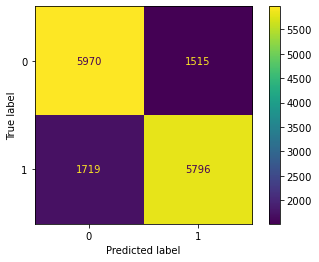

In [63]:
plot_confusion_matrix(model, scaled_X_test, y_test)

In [65]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      7485
           1       0.79      0.77      0.78      7515

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000



# Training the model - AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
model2 = AdaBoostClassifier()  # Keeping all the hyperparameters as default

In [68]:
model2.fit(scaled_X_train, y_train)

AdaBoostClassifier()

In [69]:
preds2 = model2.predict(scaled_X_test)

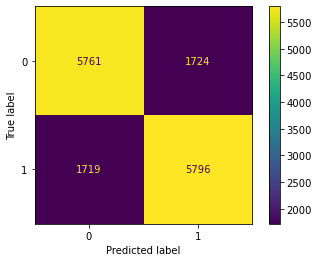

In [70]:
plot_confusion_matrix(model2, scaled_X_test, y_test)

In [72]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7485
           1       0.77      0.77      0.77      7515

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



# Training the model - Decision Trees

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model3 = DecisionTreeClassifier()

In [75]:
model3.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [76]:
preds3 = model3.predict(scaled_X_test)

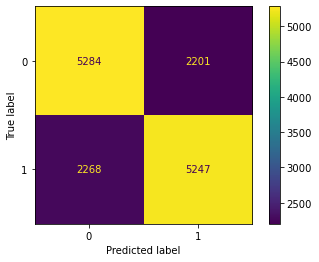

In [77]:
plot_confusion_matrix(model3, scaled_X_test, y_test)

In [78]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      7485
           1       0.70      0.70      0.70      7515

    accuracy                           0.70     15000
   macro avg       0.70      0.70      0.70     15000
weighted avg       0.70      0.70      0.70     15000



# Conclusion
* Our efforts have given us a model (Random Forest, in this case - more details below) that will label every new user as "highly likely" (or "highly unlikely) to subscribe. We can further validate our results by running our predictions on daily new installs and see whether our accuracy is consistent. From there, we can narrow our marketing efforts to only those users "unlikely" to subscribe and thus increase our subscription rate.
* The increase in overall subscriptions can measure the benefit of this model to the company. Recall that those already likely to subscribe will do so, and, although we can still give them offers, we don't have to go all out. On the other hand, users likely to leave may convert to paid subscribers if we give them an offer they cannot refuse. For example, these offers can come in the form of '1st month free' or '50% off yearly subscriptions'. The latter shows that great offers can still be structured in a way that brings overall benefit to the company because we are locking the user in for an extended periond!
* This project also aimed at comparing the performances of various Tree-based classification models. We looked at 3 different models and have concluded that Random Forest (an Ensemble based model) outperformed the Decision Tree model in this context (as one might expect). Although AdaBoost, while focussing on the 'stumps' of difficult scenarios, can give accurate predictions that the Random Forests in most of the cases, it could not give accurate predictions for this project (as indicated by Precision/Recall and F1-scores when compared to Random Forests). A detailed difference between RandomForests and AdaBoost models can be found [here](https://vitalflux.com/differences-between-random-forest-vs-adaboost/).